#### ML : Decision Tree

พัชรพล อ่วมโอฬาร 6210422018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
sns.set(style="ticks")

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# IMPORT FROM LOCAL FILE (Downloaded form webSite)
pathStr = 'source'
filename = pathStr+'\wine.data'

In [5]:
col_name = ['CLASS','ALC','MLA','ASH','AOA','MAG','PHE','FLA','NFL','PRO','COL','HUE','ODW','PRL']

In [6]:
df_wine = pd.read_csv(filename, sep=',', lineterminator='\n', header=None, names=col_name)

In [7]:
df_wine.head(5)

,CLASS,ALC,MLA,ASH,AOA,MAG,PHE,FLA,NFL,PRO,COL,HUE,ODW,PRL
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Data preprocessing

In [8]:
target = df_wine[['CLASS']]

In [9]:
data = df_wine.drop('CLASS', axis=1)

In [10]:
cols = list(data.columns)

PCA ลดจำนวน Attribute จาก 13 เหลือ 2

In [11]:
df_wine_std = StandardScaler().fit_transform(data)

In [12]:
pca = PCA(n_components=2)

In [13]:
pca_fit = pca.fit_transform(df_wine_std)

In [14]:
pca_pre_join = pd.DataFrame(data=pca_fit, columns=['PCA1','PCA2'])

In [15]:
principal_Df = pd.concat([pca_pre_join, target], axis=1)

In [16]:
principal_Df.head(3)

,PCA1,PCA2,CLASS
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


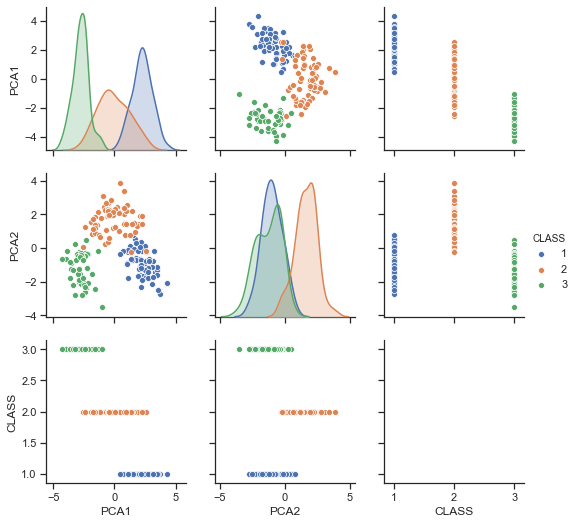

In [17]:
sns.pairplot(principal_Df, hue='CLASS')

Split train-test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(pca_pre_join, target, test_size=0.2, random_state=42)

Build model

In [19]:
h = .02
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [21]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

No handles with labels found to put in legend.


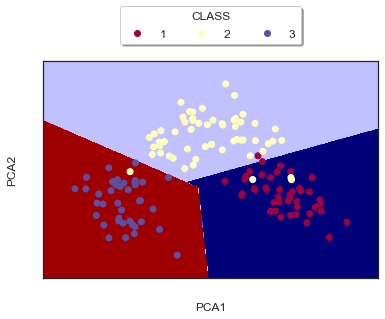

In [22]:
fig, ax = plt.subplots()
plt.contourf(xx, yy, Z, cmap=plt.cm.seismic, alpha=1)

# Plot also the training points
scatter = ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1],c=y_train.iloc[:,0], cmap=plt.cm.Spectral)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.legend(loc='upper left')
legend1 = ax.legend(*scatter.legend_elements(),loc='lower center',ncol=3,fontsize=12, title="CLASS"
                   ,bbox_to_anchor=(0.5, 1.05),fancybox=True, shadow=True)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

plt.show()

In [34]:
avg = svc.score(X_test, y_test, sample_weight=None)

In [36]:
print(f'Mean accuracy : {avg:.4f}')

Mean accuracy : 1.0000
